# Contribuintes empregados por Ano

### Fonte dos dados

Estatísticas de contribuintes empregados por UF de localização do estabelecimento e ano da competência da Guia de Recolhimento do Fundo de Garantia do Tempo de Serviço e Informações à Previdência Social (GFIP). Contribuintes empregados, com mais de um emprego, apresentam como remuneração a soma dos salários recebidos em cada vínculo.

http://dados.gov.br/dataset/contribuintes-empregados-por-uf1

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

## Lendo o arquivo .csv

In [88]:
df = pd.read_csv('./contrib-ativos-uf.csv',  encoding = "ISO-8859-1")

df.shape

(561, 7)

In [54]:
df.head(5)

,Ano,Unidade da Federação,Qtde Contribuintes Empregados,Quantidade de Vínculos,Vl Remuneração (R$),Número Médio Mensal Cont Emprg,Estatísticas Cont Empregado
0,1996,Rondônia,70308,76866.0,"233763021,25",50075.0,Qtde Contribuintes Empregados
1,1996,Acre,27384,30142.0,"105674804,27",21291.0,Qtde Contribuintes Empregados
2,1996,Amazonas,154924,176036.0,"809650218,26",111825.0,Qtde Contribuintes Empregados
3,1996,Roraima,12184,13390.0,"44587685,52",8210.0,Qtde Contribuintes Empregados
4,1996,Pará,290465,319896.0,"1154186297,36",218728.0,Qtde Contribuintes Empregados


In [94]:
df.tail(5)

,Ano,Unidade da Federação,Qtde Contribuintes Empregados,Quantidade de Vínculos,Vl Remuneração (R$),Número Médio Mensal Cont Emprg,Estatísticas Cont Empregado
556,2015,Mato Grosso,1013101,1278408.0,"17565764065,75",729200.0,Qtde Contribuintes Empregados
557,2015,Goiás,1781567,2158680.0,"30447184180,94",1298755.0,Qtde Contribuintes Empregados
558,2015,Distrito Federal,1061546,1275680.0,"30258958376,50",808436.0,Qtde Contribuintes Empregados
559,2015,Ignorado,97673,118152.0,"1566405923,39",71100.0,Qtde Contribuintes Empregados
560,-,-,-,NaN,NaN,NaN,NaN


Remover as linhas que possuem o valor do ano como '-'

In [105]:
df = df.drop(df[df['Ano'] == '-'].index)

print(df.shape)

(560, 7)


### (Eixo X) - Lista dos anos

In [144]:
#anos = np.array(list(filter(lambda n: n.isdigit(), df['Ano'].unique())))
anos = np.array(df['Ano'])
anos = np.unique(anos)
anos = anos.astype(int)

### (Eixo Y) - Quantidade de contribuintes por ano

In [146]:
df_index = df.columns[2]
contribuintes = []

for ano in anos:
    valores = [int(df.loc[l][df_index]) 
                 for l in range(0, df.shape[0]) 
                 if int(df.loc[l]['Ano']) == ano]
    
    contribuintes.append(np.sum(valores))

    

## Plotando o gráfico

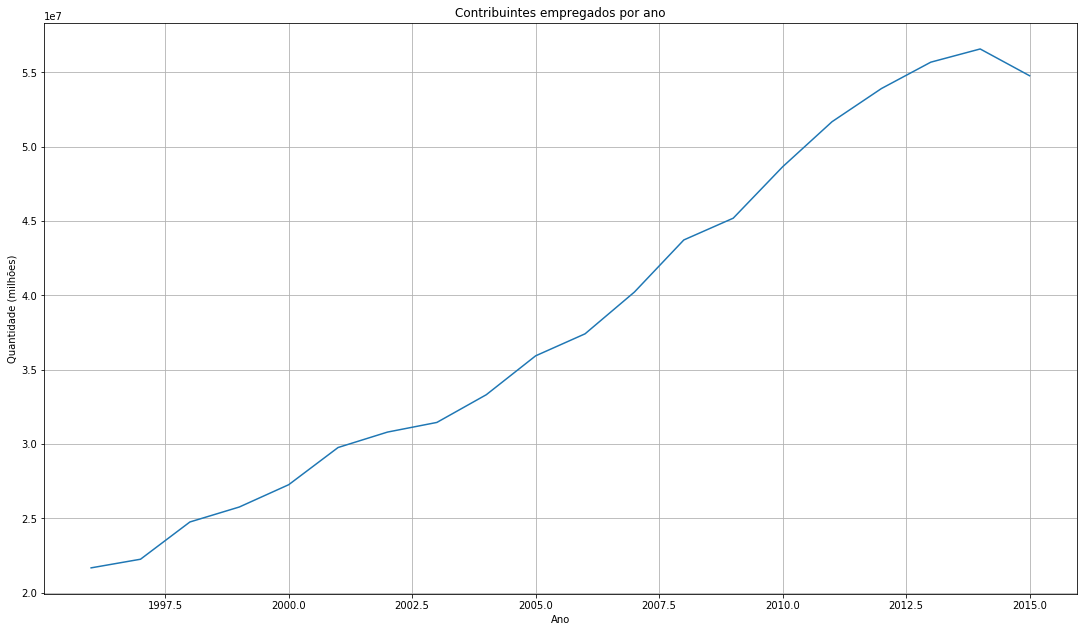

In [166]:
fig, ax = plt.subplots()

ax.plot(anos, contribuintes)

ax.set(xlabel='Ano', ylabel='Quantidade (milhões)',
       title='Contribuintes empregados por ano')

ax.grid()

fig.set_size_inches(18.5, 10.5)
plt.show()